# Ads Analysis

In [1]:
# import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm

from jupyterthemes import jtplot
jtplot.style()
%matplotlib inline 

In [2]:
# import dataframe 
df = pd.read_csv('ad_table.csv',parse_dates=['date'])
df.head()

,date,shown,clicked,converted,avg_cost_per_click,total_revenue,ad
0,2015-10-01,65877,2339,43,0.90,641.62,ad_group_1
1,2015-10-02,65100,2498,38,0.94,756.37,ad_group_1
2,2015-10-03,70658,2313,49,0.86,970.90,ad_group_1
3,2015-10-04,69809,2833,51,1.01,907.39,ad_group_1
4,2015-10-05,68186,2696,41,1.00,879.45,ad_group_1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2115 entries, 0 to 2114
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                2115 non-null   datetime64[ns]
 1   shown               2115 non-null   int64         
 2   clicked             2115 non-null   int64         
 3   converted           2115 non-null   int64         
 4   avg_cost_per_click  2115 non-null   float64       
 5   total_revenue       2115 non-null   float64       
 6   ad                  2115 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(1)
memory usage: 115.8+ KB


# Goal 
- If you had to identify the 5 best ad groups, which ones would they be? Which metric did you choose to identify the best ad groups? Why? Explain the pros of your metric as well as the possible cons.
- For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).
- Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.

## If you had to identify the 5 best ad groups, which ones would they be? Which metric did you choose to identify the best ad groups? Why? Explain the pros of your metric as well as the possible cons.

In [4]:
# three metrics to evaluate ads performances 
df['click/shown'] = df.clicked/df.shown
df['coverted_rate'] = df.converted / df.clicked
df['click_per_revenue'] = df.total_revenue / df.converted

In [5]:
# average metrics shown per ads
metric_performance = df.groupby('ad')[[
    'click/shown', 'coverted_rate', 'click_per_revenue'
]].mean()
metric_performance

,click/shown,coverted_rate,click_per_revenue
ad,,,
ad_group_1,0.039003,0.017594,15.643046
ad_group_10,0.014175,0.011865,15.100673
ad_group_11,0.061081,0.048767,13.901665
ad_group_12,0.059848,0.092007,15.503731
ad_group_13,0.085635,0.095344,15.811564
ad_group_14,0.029926,0.083646,15.332520
ad_group_15,0.022943,0.047548,15.182557
ad_group_16,0.026625,0.089641,15.124591
ad_group_17,0.008807,0.011786,13.308753


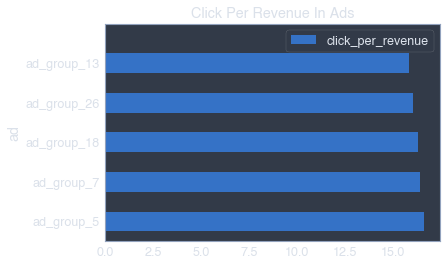

In [6]:
# metrics used here is click per revenue
metric_performance[['click_per_revenue']].sort_values(by='click_per_revenue',
                                                      ascending=False).head(5).plot(kind = 'barh')
plt.ylim(-0.5,5)
plt.title('Click Per Revenue In Ads')
plt.grid(False)
plt.show()

**`Reasons choose this metrics:`**可以衡量广告每一次点击所带来的金钱

**`Pros: `**将点击的归结到报酬

**`Cons:`**没有考虑到广告转化率的不同

## For each group, predict how many ads will be shown on Dec, 15 (assume each ad group keeps following its trend).

In [7]:
shown_by_date = pd.pivot_table(data=df,
                               index=['ad'],
                               columns='date',
                               values='shown',
                               aggfunc=np.sum)
shown_by_date

date,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,...,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22
ad,,,,,,,,,,,,,,,,,,,,,
ad_group_1,65877.0,65100.0,70658.0,69809.0,68186.0,66864.0,68227.0,68520.0,67250.0,67873.0,...,72939.0,69212.0,74549.0,72724.0,71322.0,67866.0,72607.0,68974.0,73793.0,75829.0
ad_group_10,97590.0,101799.0,102065.0,104539.0,108520.0,109361.0,101415.0,112865.0,108985.0,119754.0,...,116237.0,119984.0,122090.0,122294.0,122503.0,114753.0,125348.0,131225.0,115513.0,121324.0
ad_group_11,16451.0,17699.0,17786.0,16349.0,17703.0,17468.0,16766.0,19298.0,19151.0,18309.0,...,19871.0,19340.0,19911.0,20067.0,20423.0,19838.0,20019.0,20007.0,0.0,20437.0
ad_group_12,26000.0,26456.0,29113.0,27088.0,27250.0,27967.0,27374.0,27684.0,28593.0,28362.0,...,30695.0,31033.0,30232.0,30638.0,28411.0,27504.0,28944.0,0.0,28401.0,29480.0
ad_group_13,162075.0,156520.0,158721.0,168742.0,172151.0,170787.0,157452.0,147795.0,151178.0,154686.0,...,158855.0,161889.0,165597.0,158326.0,161199.0,162365.0,159725.0,159950.0,164310.0,165662.0
ad_group_14,8556.0,8086.0,7708.0,7665.0,7719.0,7494.0,7783.0,8574.0,8356.0,8530.0,...,8634.0,8365.0,8315.0,8291.0,8681.0,8684.0,8909.0,8547.0,8653.0,8967.0
ad_group_15,14811.0,15326.0,16063.0,15156.0,15088.0,15920.0,14981.0,15805.0,15201.0,15970.0,...,16000.0,16043.0,15945.0,14942.0,16995.0,14407.0,16140.0,15289.0,15216.0,14873.0
ad_group_16,29364.0,28636.0,30257.0,29979.0,30600.0,30270.0,30935.0,31393.0,31850.0,31499.0,...,30093.0,31333.0,30733.0,29262.0,31986.0,30987.0,30192.0,28341.0,30879.0,31246.0
ad_group_17,119141.0,122091.0,125866.0,117050.0,126830.0,121725.0,128692.0,127762.0,136497.0,133095.0,...,145660.0,139609.0,145326.0,144111.0,148767.0,143802.0,140575.0,145576.0,142373.0,138435.0


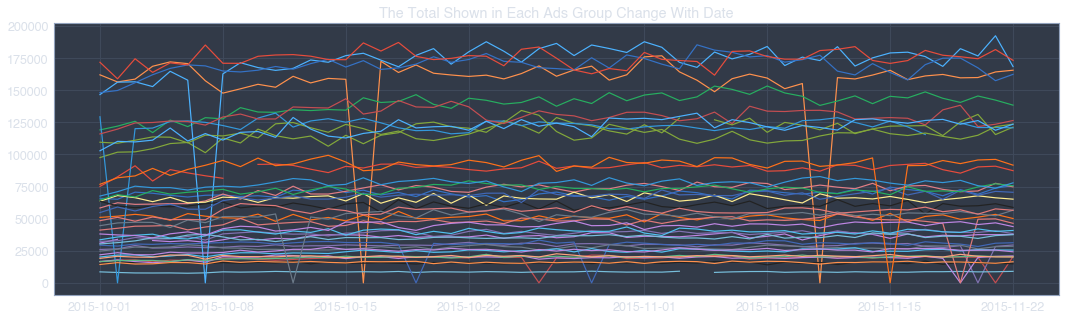

In [8]:
plt.figure(figsize = (18,5))
plt.plot(shown_by_date.T)
plt.title('The Total Shown in Each Ads Group Change With Date')
plt.show()

In [9]:
forcast = []
for col in shown_by_date.T.columns:
    endog = shown_by_date.T[col]
    mod = sm.tsa.SARIMAX(endog)
    res = mod.fit()
    fcast_res3 = res.get_forecast('2015-12-15')
    forcast.append(fcast_res3.summary_frame().loc['2015-12-15','mean'])

/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: V

/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/Users/matsujun/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so

In [10]:
time = pd.to_datetime('2015-12-15')
shown_by_date[time] = forcast

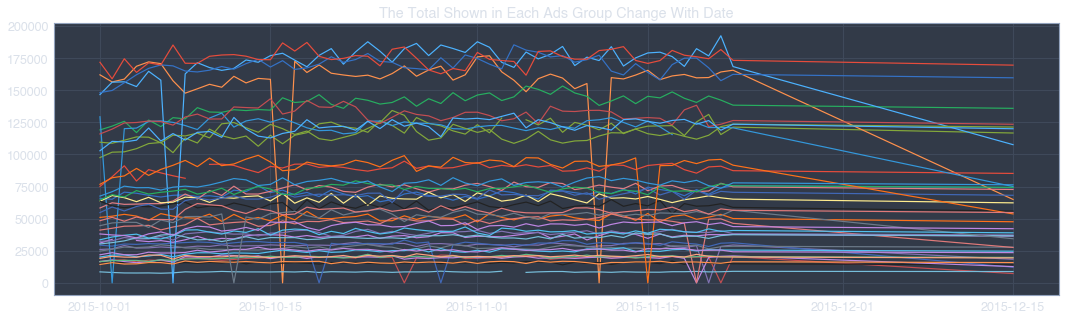

In [11]:
plt.figure(figsize = (18,5))
plt.plot(shown_by_date.T)
plt.title('The Total Shown in Each Ads Group Change With Date')
plt.show()

## Cluster ads into 3 groups: the ones whose avg_cost_per_click is going up, the ones whose avg_cost_per_click is flat and the ones whose avg_cost_per_click is going down.

In [38]:
cost_per_click_by_date = pd.pivot_table(data=df,
                               index=['ad'],
                               columns='date',
                               values='avg_cost_per_click',
                               aggfunc=np.mean)
cost_per_click_by_date

date,2015-10-01,2015-10-02,2015-10-03,2015-10-04,2015-10-05,2015-10-06,2015-10-07,2015-10-08,2015-10-09,2015-10-10,...,2015-11-13,2015-11-14,2015-11-15,2015-11-16,2015-11-17,2015-11-18,2015-11-19,2015-11-20,2015-11-21,2015-11-22
ad,,,,,,,,,,,,,,,,,,,,,
ad_group_1,0.90,0.94,0.86,1.01,1.00,0.98,0.94,1.07,0.88,0.93,...,1.02,1.01,1.00,1.01,0.92,1.09,1.00,1.08,0.99,0.98
ad_group_10,1.07,1.21,1.12,1.33,1.19,1.29,1.17,1.01,1.11,1.12,...,1.33,1.24,1.22,1.12,1.19,1.13,1.07,1.29,0.89,1.23
ad_group_11,1.59,1.79,1.81,1.71,1.46,1.79,1.87,1.81,1.81,1.70,...,1.82,1.86,1.58,1.53,1.70,1.75,1.98,1.82,0.00,1.89
ad_group_12,2.23,1.97,2.06,2.14,2.06,2.31,2.20,2.30,1.96,2.09,...,1.97,2.09,2.35,2.32,2.24,2.27,2.14,0.00,2.06,2.09
ad_group_13,1.81,1.83,1.31,1.72,1.71,1.81,1.61,1.73,1.69,1.92,...,1.77,1.71,1.87,1.56,1.73,1.84,1.71,1.74,1.67,1.73
ad_group_14,0.77,0.69,0.76,0.74,0.66,0.75,0.67,0.76,0.80,0.69,...,0.78,0.76,0.68,0.60,0.75,0.67,0.54,0.74,0.67,0.76
ad_group_15,0.81,0.85,0.67,0.64,0.78,0.76,0.78,0.73,0.85,0.86,...,0.80,0.86,0.81,0.77,0.65,0.83,0.95,0.83,0.74,0.81
ad_group_16,0.63,0.68,0.55,0.60,0.62,0.60,0.44,0.44,0.55,0.56,...,0.53,0.55,0.52,0.54,0.59,0.50,0.50,0.50,0.59,0.62
ad_group_17,0.40,0.40,0.40,0.39,0.38,0.43,0.41,0.38,0.40,0.44,...,0.39,0.41,0.42,0.40,0.48,0.38,0.38,0.37,0.38,0.41


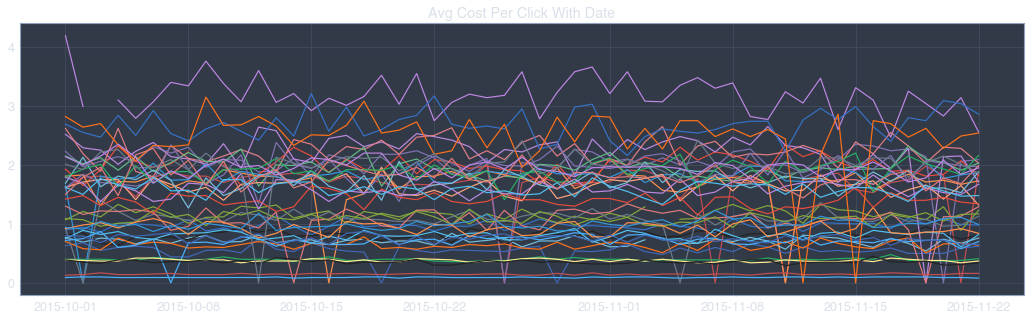

In [41]:
plt.figure(figsize = (18,5))
plt.plot(cost_per_click_by_date.T)
plt.title('Avg Cost Per Click With Date')
plt.show()

In [42]:
 cost_per_click_by_date['increase'] = (cost_per_click_by_date['2015-11-22'] - cost_per_click_by_date['2015-10-01'])/ cost_per_click_by_date['2015-10-01']

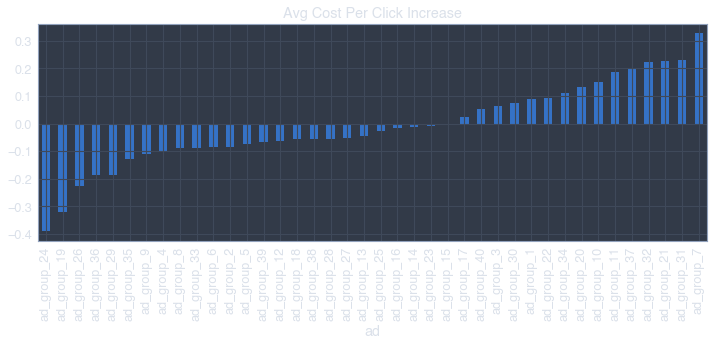

In [43]:
plt.figure(figsize=(12, 4))
cost_per_click_by_date['increase'].sort_values().plot(kind = 'bar')
plt.title('Avg Cost Per Click Increase')
plt.show()

In [46]:
cost_per_click_by_date['group'] = pd.cut(cost_per_click_by_date['increase'],
                                         bins=3,
                                         labels=['down', 'flat', 'up'])
cost_per_click_by_date

date,2015-10-01 00:00:00,2015-10-02 00:00:00,2015-10-03 00:00:00,2015-10-04 00:00:00,2015-10-05 00:00:00,2015-10-06 00:00:00,2015-10-07 00:00:00,2015-10-08 00:00:00,2015-10-09 00:00:00,2015-10-10 00:00:00,...,2015-11-15 00:00:00,2015-11-16 00:00:00,2015-11-17 00:00:00,2015-11-18 00:00:00,2015-11-19 00:00:00,2015-11-20 00:00:00,2015-11-21 00:00:00,2015-11-22 00:00:00,increase,group
ad,,,,,,,,,,,,,,,,,,,,,
ad_group_1,0.90,0.94,0.86,1.01,1.00,0.98,0.94,1.07,0.88,0.93,...,1.00,1.01,0.92,1.09,1.00,1.08,0.99,0.98,0.088889,up
ad_group_10,1.07,1.21,1.12,1.33,1.19,1.29,1.17,1.01,1.11,1.12,...,1.22,1.12,1.19,1.13,1.07,1.29,0.89,1.23,0.149533,up
ad_group_11,1.59,1.79,1.81,1.71,1.46,1.79,1.87,1.81,1.81,1.70,...,1.58,1.53,1.70,1.75,1.98,1.82,0.00,1.89,0.188679,up
ad_group_12,2.23,1.97,2.06,2.14,2.06,2.31,2.20,2.30,1.96,2.09,...,2.35,2.32,2.24,2.27,2.14,0.00,2.06,2.09,-0.062780,flat
ad_group_13,1.81,1.83,1.31,1.72,1.71,1.81,1.61,1.73,1.69,1.92,...,1.87,1.56,1.73,1.84,1.71,1.74,1.67,1.73,-0.044199,flat
ad_group_14,0.77,0.69,0.76,0.74,0.66,0.75,0.67,0.76,0.80,0.69,...,0.68,0.60,0.75,0.67,0.54,0.74,0.67,0.76,-0.012987,flat
ad_group_15,0.81,0.85,0.67,0.64,0.78,0.76,0.78,0.73,0.85,0.86,...,0.81,0.77,0.65,0.83,0.95,0.83,0.74,0.81,0.000000,flat
ad_group_16,0.63,0.68,0.55,0.60,0.62,0.60,0.44,0.44,0.55,0.56,...,0.52,0.54,0.59,0.50,0.50,0.50,0.59,0.62,-0.015873,flat
ad_group_17,0.40,0.40,0.40,0.39,0.38,0.43,0.41,0.38,0.40,0.44,...,0.42,0.40,0.48,0.38,0.38,0.37,0.38,0.41,0.025000,flat


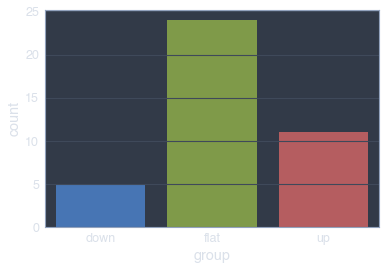

In [47]:
sns.countplot(cost_per_click_by_date['group'])